### A project to determine flight delays
Participants:\
Chheang Duong\
Christian Rolph\
Jacob Chesnut

In [2]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# define paths to data
combinedFlights2018 = "archive\Combined_Flights_2018.csv"
combinedFlights2019 = 'archive\Combined_Flights_2019.csv'


In [4]:
# import datasets
dataFrame18=pd.read_csv(combinedFlights2018, usecols=['ArrDelayMinutes'])
dataFrame19=pd.read_csv(combinedFlights2019, usecols=['ArrDelayMinutes'])

The ArrDelayMinutes feature shows the difference in minutes between scheduled and actual arrival time. Early arrivals are set to 0. We'll plot this feature to see the distrobution.

In [5]:
# Needed Functions

# Simple understanding of ArrDelayMinutes min/max
def GetDelayValues(dataFrame):
    maxValue = dataFrame['ArrDelayMinutes'].max()
    minValue = dataFrame['ArrDelayMinutes'].min()
    print(f"Longest Delay: {maxValue} minutes")
    print(f"Shortest Delay: {minValue} minutes")

# Function to show DataFrame basic info
def ShowBasicDataFrameInfo(dataFrame):
    print("DataFrame Info")
    print(dataFrame.info())
    print("DataFrame Describe")
    print(dataFrame.describe())
    print("DataFrame Head")
    print(dataFrame.head())

In [6]:
print("2018 Data")
ShowBasicDataFrameInfo(dataFrame18)

2018 Data
DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689512 entries, 0 to 5689511
Data columns (total 1 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ArrDelayMinutes  float64
dtypes: float64(1)
memory usage: 43.4 MB
None
DataFrame Describe
       ArrDelayMinutes
count     5.586619e+06
mean      1.368363e+01
std       4.402848e+01
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       8.000000e+00
max       2.635000e+03
DataFrame Head
   ArrDelayMinutes
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0


In [7]:
print("2019 Data")
ShowBasicDataFrameInfo(dataFrame19)

2019 Data
DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091684 entries, 0 to 8091683
Data columns (total 1 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ArrDelayMinutes  float64
dtypes: float64(1)
memory usage: 61.7 MB
None
DataFrame Describe
       ArrDelayMinutes
count     7.917264e+06
mean      1.441881e+01
std       4.841670e+01
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       8.000000e+00
max       2.973000e+03
DataFrame Head
   ArrDelayMinutes
0              0.0
1              0.0
2              0.0
3            136.0
4              5.0


In [8]:
def PrintInvalidEntriesForArrDelayMinutes(dataFrame):
    totalEntries = dataFrame.ArrDelayMinutes.shape[0]
    numInvalidEntries = dataFrame.ArrDelayMinutes.isnull().sum()
    print(f"There are {totalEntries:,} total entries for ArrDelayMinutes")
    print(f"Of those, there are {numInvalidEntries:,} NaN entries for ArrDelayMinutes")

def RemoveRowsWithInvalidDataForArrDelayMinutes(dataFrame):
    print("Before cleaning:")
    PrintInvalidEntriesForArrDelayMinutes(dataFrame)
    cleanedDataFrame = dataFrame.dropna(subset=['ArrDelayMinutes'])
    print()

    print("After cleaning:")
    PrintInvalidEntriesForArrDelayMinutes(cleanedDataFrame)
    return cleanedDataFrame

In [9]:
print("2018 Data Cleaning")
dataFrame18 = RemoveRowsWithInvalidDataForArrDelayMinutes(dataFrame18)

print()
print("2019 Data Cleaning")
dataFrame19 = RemoveRowsWithInvalidDataForArrDelayMinutes(dataFrame19)

2018 Data Cleaning
Before cleaning:
There are 5,689,512 total entries for ArrDelayMinutes
Of those, there are 102,893 NaN entries for ArrDelayMinutes

After cleaning:
There are 5,586,619 total entries for ArrDelayMinutes
Of those, there are 0 NaN entries for ArrDelayMinutes

2019 Data Cleaning
Before cleaning:
There are 8,091,684 total entries for ArrDelayMinutes
Of those, there are 174,420 NaN entries for ArrDelayMinutes

After cleaning:
There are 7,917,264 total entries for ArrDelayMinutes
Of those, there are 0 NaN entries for ArrDelayMinutes


In [10]:
GetDelayValues(dataFrame18)

def ShowHistArrDelayMinutes(dataFrame):
    histogram = dataFrame['ArrDelayMinutes'].plot(kind="hist", bins=50, xlabel="test")
    histogram.set_title("ArrDelayMinutes Distribution")
    histogram.set_xlabel("Minutes of Delay")
    histogram.set_ylabel("Number of Occurances")

Longest Delay: 2635.0 minutes
Shortest Delay: 0.0 minutes


2018 Histogram


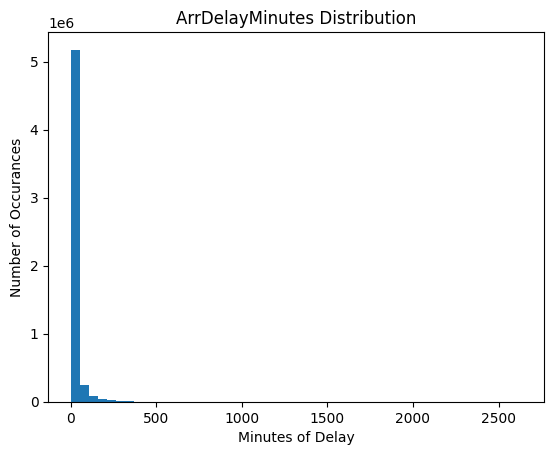

In [11]:
print("2018 Histogram")
ShowHistArrDelayMinutes(dataFrame18)

2019 Histogram


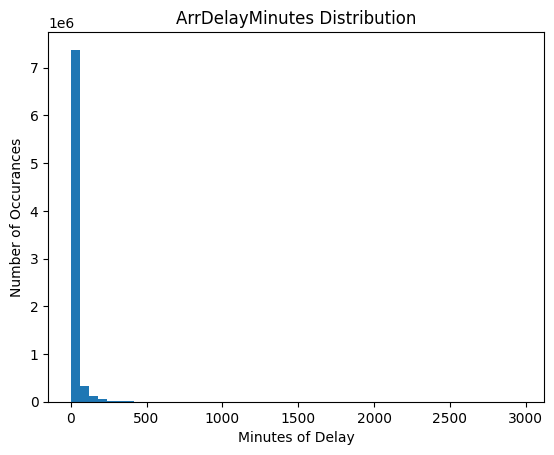

In [12]:
print("2019 Histogram")
ShowHistArrDelayMinutes(dataFrame19)

The number of on-time flights significantly overshadows the other data. We'll replot to show occurances other than on-time.

In [13]:
def RemoveEntriesForOnTimeOrEarlyFlights(dataFrame):
    totalEntries = dataFrame.ArrDelayMinutes.shape[0]
    print(f"There are {totalEntries:,} total entries for AddDelayMinutes.")
    print(f"Of those, {dataFrame.ArrDelayMinutes.value_counts()[0]:,} are on-time or early flights.")

    dataFrameClean = dataFrame[dataFrame.ArrDelayMinutes != 0]
    totalEntries = dataFrameClean.ArrDelayMinutes.shape[0]

    print(f"After removing on-time or early flights, there are now {totalEntries:,} total entries for ArrDelayMinutes")
    return dataFrameClean

print("2018")
cleanDataFrame18 = RemoveEntriesForOnTimeOrEarlyFlights(dataFrame18)
print()
print("2019")
cleanDataFrame19 = RemoveEntriesForOnTimeOrEarlyFlights(dataFrame19)

2018
There are 5,586,619 total entries for AddDelayMinutes.
Of those, 3,576,135 are on-time or early flights.
After removing on-time or early flights, there are now 2,010,484 total entries for ArrDelayMinutes

2019
There are 7,917,264 total entries for AddDelayMinutes.
Of those, 5,180,189 are on-time or early flights.
After removing on-time or early flights, there are now 2,737,075 total entries for ArrDelayMinutes


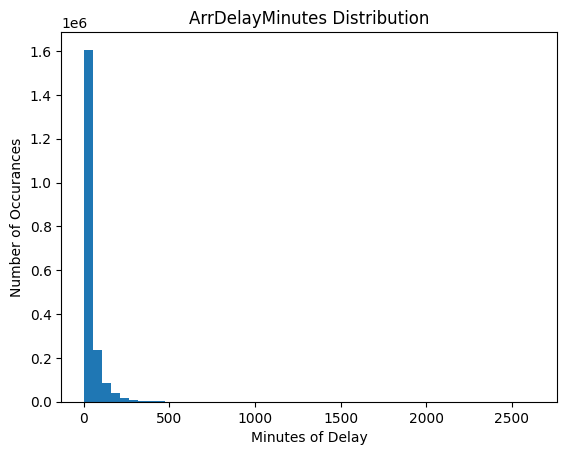

In [14]:
# Redo histogram
ShowHistArrDelayMinutes(cleanDataFrame18)

Even after removing the on-time flights. Almost all delays were less than 4hrs long. This makes sense since even a 4hr delay would be very excessive.

In [15]:
# Do a histogram on just delays from 250 min or less
def GetDelaysUnder250Min(dataFrame):
    filteredDataframe = dataFrame[dataFrame['ArrDelayMinutes'] <= 250]
    print(f"There are {filteredDataframe.shape[0]:,} entries less than or equal to 250 min.")

    return filteredDataframe

In [16]:
print("2018")
dfOnlyDelaysUnder250_18 = GetDelaysUnder250Min(cleanDataFrame18)
dfDelaysUnder250IncludingOnTime18 = GetDelaysUnder250Min(dataFrame18)

2018
There are 1,983,321 entries less than or equal to 250 min.
There are 5,559,456 entries less than or equal to 250 min.


In [17]:
print("2019")
dfOnlyDelaysUnder250_19 = GetDelaysUnder250Min(cleanDataFrame19)
dfDelaysUnder250IncludingOnTime19 = GetDelaysUnder250Min(dataFrame19)

2019
There are 2,689,236 entries less than or equal to 250 min.
There are 7,869,425 entries less than or equal to 250 min.


2018


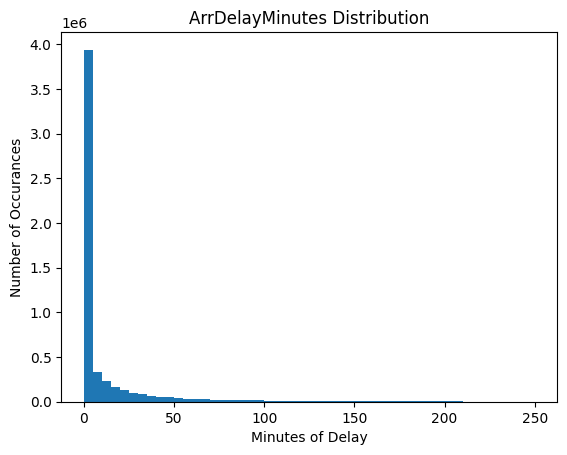

In [18]:
print("2018")
ShowHistArrDelayMinutes(dfDelaysUnder250IncludingOnTime18)

2019


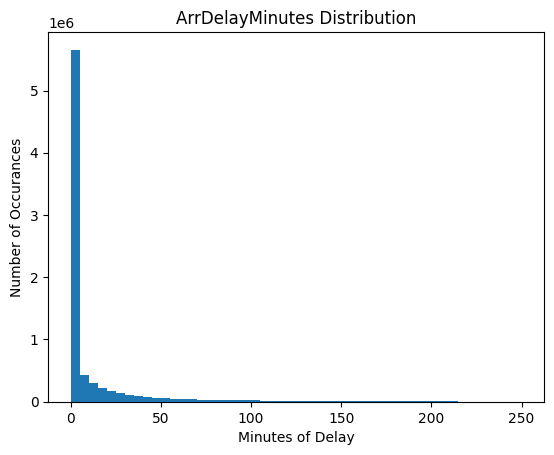

In [19]:
print("2019")
ShowHistArrDelayMinutes(dfDelaysUnder250IncludingOnTime19)

2018


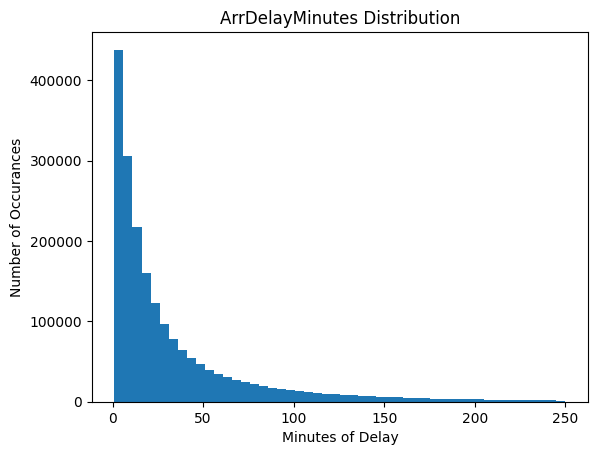

In [20]:
print(2018)
ShowHistArrDelayMinutes(dfOnlyDelaysUnder250_18)

2019


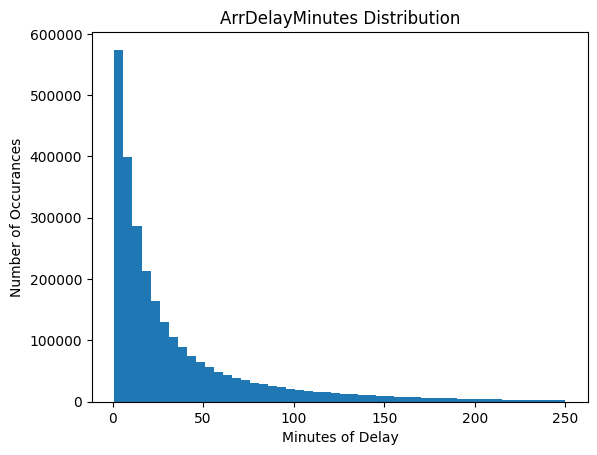

In [21]:
print(2019)
ShowHistArrDelayMinutes(dfOnlyDelaysUnder250_19)

Now, we'll try some attempts at binning the data.

In [22]:
dfOnlyDelaysUnder250_18.ArrDelayMinutes.describe()
binningFor2018 = pd.qcut(dfOnlyDelaysUnder250_18.ArrDelayMinutes, q=5)

binningFor2018.value_counts()


(0.999, 5.0]     437914
(5.0, 12.0]      400476
(51.0, 250.0]    393145
(23.0, 51.0]     392690
(12.0, 23.0]     359096
Name: ArrDelayMinutes, dtype: int64

In [23]:
dfOnlyDelaysUnder250_19.ArrDelayMinutes.describe()
binningFor2019 = pd.qcut(dfOnlyDelaysUnder250_19.ArrDelayMinutes, q=5)

binningFor2019.value_counts()

(0.999, 5.0]     574018
(12.0, 25.0]     537365
(55.0, 250.0]    533181
(5.0, 12.0]      525116
(25.0, 55.0]     519556
Name: ArrDelayMinutes, dtype: int64

In [24]:
# Combine 2018 and 2019 and get bins for values 1-250
combinedDataFrames = pd.concat([dfOnlyDelaysUnder250_18, dfOnlyDelaysUnder250_19], axis=0)
combinedBinning = pd.qcut(combinedDataFrames.ArrDelayMinutes, q=5)

combinedBinning.value_counts()

(0.999, 5.0]     1011932
(53.0, 250.0]     931673
(5.0, 12.0]       925592
(24.0, 53.0]      913728
(12.0, 24.0]      889632
Name: ArrDelayMinutes, dtype: int64

In [27]:
# Combine 2018 and 2019 and get bins for values 1-MAX
combinedDfGreaterThan0 = pd.concat([cleanDataFrame18, cleanDataFrame19], axis=0)
combinedBinningGreaterThan0 = pd.qcut(combinedDfGreaterThan0.ArrDelayMinutes, q=5)
combinedBinningGreaterThan0.value_counts()

(0.999, 5.0]      1011932
(12.0, 25.0]       941814
(57.0, 2973.0]     934962
(25.0, 57.0]       933259
(5.0, 12.0]        925592
Name: ArrDelayMinutes, dtype: int64